In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Configuration
input_file = '../datasets/kaggle_btcusd_minute_raw.csv'
output_file = '../datasets/kaggle_btcusd_hourly.csv'

In [8]:
# 1. Load Data
try:
    df_raw = pd.read_csv(input_file)
    print("Raw data loaded successfully.")
    print(df_raw.head())
    print(df_raw.columns)
except Exception as e:
    print(f"Error loading data: {e}")

Raw data loaded successfully.
      Timestamp  Open  High   Low  Close  Volume
0  1.325412e+09  4.58  4.58  4.58   4.58     0.0
1  1.325412e+09  4.58  4.58  4.58   4.58     0.0
2  1.325412e+09  4.58  4.58  4.58   4.58     0.0
3  1.325412e+09  4.58  4.58  4.58   4.58     0.0
4  1.325412e+09  4.58  4.58  4.58   4.58     0.0
Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [9]:
# 2. Transform and Resample
# Identify timestamp and close columns
# Assuming columns like 'Timestamp', 'Close' or similar.

# We need to inspect the columns first, but let's write generic code that we can adjust if needed.
# Common Kaggle BTC datasets have 'Timestamp' (unix) or 'Date'.

# Let's assume standard names or fix them after seeing the output of cell 1.
# For now, I will write code to convert timestamp and resample.

# Placeholder for column names - will be updated after running cell 1 if needed
# df_raw['Timestamp'] = pd.to_datetime(df_raw['Timestamp'], unit='s') # Common in crypto datasets
# or
# df_raw['Date'] = pd.to_datetime(df_raw['Date'])

# Let's try to be smart. If 'Timestamp' exists and looks like int, use unit='s'.

if 'Timestamp' in df_raw.columns:
    # Check if it's unix timestamp (large integers)
    if df_raw['Timestamp'].dtype == 'int64' or df_raw['Timestamp'].dtype == 'float64':
        df_raw['datetime'] = pd.to_datetime(df_raw['Timestamp'], unit='s')
    else:
        df_raw['datetime'] = pd.to_datetime(df_raw['Timestamp'])
elif 'Date' in df_raw.columns:
    df_raw['datetime'] = pd.to_datetime(df_raw['Date'])
else:
    # Fallback: try to find a column with 'date' or 'time' in name
    date_cols = [c for c in df_raw.columns if 'date' in c.lower() or 'time' in c.lower()]
    if date_cols:
        df_raw['datetime'] = pd.to_datetime(df_raw[date_cols[0]])
    else:
        raise ValueError("Could not identify datetime column")

# Find Close column
close_col = [c for c in df_raw.columns if 'close' in c.lower()]
if close_col:
    close_col = close_col[0]
else:
    raise ValueError("Could not identify Close column")

print(f"Using datetime column: datetime (derived)")
print(f"Using close column: {close_col}")

# Set Index
df_raw.set_index('datetime', inplace=True)
df_raw.sort_index(inplace=True)

# Resample to Hourly
# We take the 'last' value of the hour for the Close price
df_hourly = df_raw[close_col].resample('h').last()

# Rename to standard
df = df_hourly.to_frame(name='btc_usd')

# Drop NaNs (if any hours are missing data)
df.dropna(inplace=True)

print("\nFirst 5 rows after resampling:")
print(df.head())

Using datetime column: datetime (derived)
Using close column: Close

First 5 rows after resampling:
                     btc_usd
datetime                    
2012-01-01 10:00:00     4.58
2012-01-01 11:00:00     4.58
2012-01-01 12:00:00     4.58
2012-01-01 13:00:00     4.58
2012-01-01 14:00:00     4.58


In [10]:
# 3. Save Processed Data
df.to_csv(output_file)
print(f"Processed data saved to: {output_file}")

Processed data saved to: ../datasets/kaggle_btcusd_hourly.csv


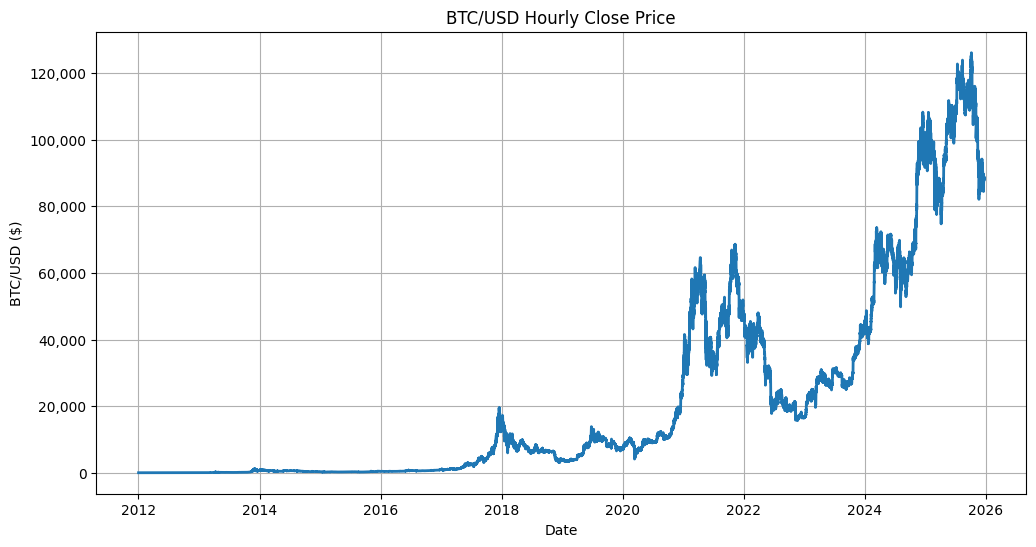

In [11]:
# 4. Visualization Check
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['btc_usd'], linestyle='-', linewidth=2)
plt.title('BTC/USD Hourly Close Price')
plt.xlabel('Date')
plt.ylabel('BTC/USD ($)')
plt.grid(True)

# Format y-axis with comma separator
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()